In [1]:
# Starting code for UVA CS 4501 Machine Learning- KNN

import numpy as np
np.random.seed(37)
# for plot
import matplotlib.pyplot as plt
#more imports
from sklearn.neighbors import KNeighborsClassifier
## the only purpose of the above import is in case that you want to compare your knn with sklearn knn
from collections import Counter
import operator

# Load file into np arrays
# x is the features
# y is the labels
def read_file(file):
    data = np.loadtxt(file, skiprows=1)
    np.random.shuffle(data)
    x = data[:, :-1]
    y = data[:, -1].astype(int)
    return x, y

# 2. Generate the i-th fold of k fold validation
# Input:
# x is an np array for training data
# y is an np array for labels
# i is an int indicating current fold
# nfolds is the total number of cross validation folds

def fold(x, y ,i, nfolds):
    valid_losses = []
    training_losses = []
    k = nfolds
    #try catching for remainder/uneven split
    m = len(x)
    extras = m % nfolds #get remainder of length of set divided by number of folds
    
    if extras != 0:
        x_train_extras = x[-extras:] #store for later
        y_train_extras = x[-extras:] #store for later
        
        x_train = y[:-extras] #discard extras
        y_train = y[:-extras]#discard extras
        
    #split the data into k equal sized array
    x_train_split = np.split(x, k)
    y_train_split = np.split(y, k)
    
    sets = []
    
    for i in range(k):
        #loop through k folds
        #take a split of the data for testing
        x_test, y_test = x_train_split[i], y_train_split[i]
        #take the remaining 3/4 of the data for training
        x_train = np.concatenate(x_train_split[:i] + x_train_split[i + 1:], axis=0)
        y_train = np.concatenate(y_train_split[:i] + y_train_split[i + 1:], axis=0)
        sets.append([x_train, x_test, y_train, y_test])
        
    #try catching for remainder/uneven split. adding to last set as training example
    if extras != 0:
        np.append(sets[-1][0], x_train_extras, axis=0)
        np.append(sets[-1][2], y_train_extras, axis=0)
        
    return sets[i]

def euclidean_distance(x,y):
    return np.sqrt(np.sum((x-y)**2))
    
# 3. Classify each testing points based on the training points
# Input
# x_train: a numpy array of training data 
# x_test: a numpy array
# k: the number of neighbors to take into account when predicting the label
# Output
# y_predict: a numpy array 
def classify(x_train, y_train, x_test, k):
    neighbors = {}
    for i in range(len(x_test)):
        distances = [] 
        for j in range(len(x_train)):
            distances.append((j, euclidean_distance(x_test[i], x_train[j]), y_train[j]))
        sorted_all = sorted(distances, key = lambda kv: kv[1])
        neighbors[i] = sorted_all[:k]
        
    y_predict = []
    for i in range(len(x_test)):
        neighbors_y = Counter([x[2] for x in neighbors[i]])
        y_predict.append(max(neighbors_y.items(), key=operator.itemgetter(1))[0])
    # your code
    # Euclidean distance as the measurement of distance in KNN
    return np.array(y_predict)

# 4. Calculate accuracy by comaring with true labels
# Input
# y_predict is a numpy array of 1s and 0s for the class prediction
# y is a numpy array of 1s and 0s for the true class label
def calc_accuracy(y_predict, y_true):
    acc = np.sum(y_true == y_predict, axis=0) / len(y_true)
    return acc

# 5. Draw the bar plot of k vs. accuracy
# klist: a list of values of ks
# accuracy_list: a list of accuracies
def barplot(klist, accuracy_list):
    plt.bar(klist, accuracy_list)
    plt.title('# of Neighbors Vs CV Accuracy')
    plt.xlabel('# of neighbors')
    plt.ylabel('Accuracy')
    plt.show()
    

# 1. Find the best K
def findBestK(x, y, klist, nfolds):
    kbest = 0
    best_acc = 0
    counter = 0
    accuracy_list = []
    for k in klist:
        fold_acc = []
        for i in range(0, nfolds - 1):
            x_train, x_test, y_train, y_test = fold(x,y, i, nfolds)
            y_predict = classify(x_train, y_train, x_test, k=k)
            accuracy = calc_accuracy(y_predict, y_test)
            fold_acc.append(accuracy)
            
        accuracy_list.append(np.mean(accuracy))
        accuracy = accuracy_list[counter]

        if accuracy > best_acc:
            kbest = k
            best_acc = accuracy
        print('Neighbors: {}, cv accuracy {}'.format(k, accuracy))
        
        counter += 1
    # plot cross validation error for each k : implement function barplot(klist, accuracy_list)
    barplot(klist, accuracy_list)
    return kbest

filename = "Movie_Review_Data.txt"
# read data
x, y = read_file(filename)
print('Num Features', x.shape[1])
print('Num Obs:', x.shape[0])
print('Count of Postive Class labels:', Counter(y)[1])
print('Count of Negative Class labels:', Counter(y)[0])
nfolds = 8
klist = [3, 5,7, 9, 11, 13]
# Implementation covers two tasks, both part of findBestK function
# Task 1 : implement kNN classifier for a given x,y,k
# Task 2 : implement 4 fold cross validation to select best k from klist

findBestK(x, y, klist, nfolds)
print('-' *25)
print('Testing with Sklearn, neighbors = 11')
model = KNeighborsClassifier( 11)
x_train, x_test, y_train, y_test = train_test_split(x,y)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
acc = calc_accuracy(y_pred, y_test)
print('sklearn KNN accuracy:', acc)

Num Features 100
Num Obs: 2000
Count of Postive Class labels: 1000
Count of Negative Class labels: 1000


KeyboardInterrupt: 

In [11]:
'''
Testing decision boundaries on IRIS with various C values



from sklearn.svm import SVC
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn import svm, datasets

iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

for i in [1e-10, 1e-1,1e1, 1e10]:
    svm = SVC(C=i, kernel='rbf')
    svm.fit(X, y)
    plot_decision_regions(X, y, clf=svm, legend=2)
    plt.title('C:{}'.format(i))
    plt.show()
'''


"\nTesting decision boundaries on IRIS with various C values\n\n\n\nfrom sklearn.svm import SVC\nimport matplotlib.pyplot as plt\nfrom mlxtend.plotting import plot_decision_regions\nfrom sklearn import svm, datasets\n\niris = datasets.load_iris()\n\nX = iris.data[:, :2]\ny = iris.target\n\nfor i in [1e-10, 1e-1,1e1, 1e10]:\n    svm = SVC(C=i, kernel='rbf')\n    svm.fit(X, y)\n    plot_decision_regions(X, y, clf=svm, legend=2)\n    plt.title('C:{}'.format(i))\n    plt.show()\n"

In [1]:
# Starting code for UVA CS 4501 ML- SVM

import numpy as np
np.random.seed(37)
import random
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

# Att: You're not allowed to use modules other than SVC in sklearn, i.e., model_selection.

# Dataset information
# the column names (names of the features) in the data files
# you can use this information to preprocess the features
col_names_x = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
             'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
             'hours-per-week', 'native-country']
col_names_y = ['label']

numerical_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
                  'hours-per-week']
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship',
                    'race', 'sex', 'native-country']


# 1. Data loading from file and pre-processing.
# Hint: Feel free to use some existing libraries for easier data pre-processing. 
# For example, as a start you can use one hot encoding for the categorical variables and normalization 
# for the continuous variables.

        
def calc_accuracy(y_predict, y_true):
    acc = np.sum(y_true == y_predict, axis=0) / len(y_true) #count where reponses match divided by len of y_test
    return acc
        
        
    
def load_data(csv_file_path, encode_cat = False, outlier_removal = True, feature_engineering = True, down_sample = False):
    print('reading in data')
    #I believe pandas is allowed. Using it for easier recognition of column names
    data = pd.read_csv(csv_file_path, names = col_names_x + col_names_y) 
    df = data.copy()
    df['label']  = df['label'].apply(lambda x: 0 if x==' <=50K' else 1)
    #df['native-country']  = df['native-country'].apply(lambda x: "Other" if x!= " United-States" else "United-States")
    df.drop(['native-country'], axis=1, inplace = True)
    if feature_engineering:
        df["marital-status"] = df["marital-status"].replace([' Married-civ-spouse',' Married-spouse-absent',' Married-AF-spouse'], 'Married')
        df["marital-status"] = df["marital-status"].replace([' Never-married',' Divorced',' Separated',' Widowed'], 'Single')
        df['race'] = df['race'].map({' White': 1, ' Asian-Pac-Islander': 1, ' Black':0, ' Amer-Indian-Eskimo':0, ' Other':0})
        df['relationship'] = df['relationship'].map({' Not-in-family':0, ' Unmarried':0, ' Own-child':0, ' Other-relative':0, ' Husband':1, ' Wife':1})
        #df.drop(categorical_cols, axis=1, inplace = True)
    if outlier_removal:
        print('removing outliers')
        df = df[(np.abs(stats.zscore(df[numerical_cols])) < 3).all(axis=1)]

    
    if encode_cat: #encode cat features / get dummies
        print('Categorical one hot encoding')
        df = pd.get_dummies(df)

    x = df.drop(['label'], axis=1) #extract ind. features
    y = df['label']#extract response
    if down_sample:
        x = x[:10000]
        y = y[:10000]
    return x,y, x.columns

def cross_validation(x_train, y_train, xcols, params, num_folds=3):
    
    #Split Data into k sets. 'Sets' contains set of sets
    ######################################################################################
    k = num_folds
    #try catching for remainder/uneven split
    m = len(x_train)
    extras = m % num_folds  #get remainder of length of set divided by number of folds
    if extras != 0:
        x_train_extras = x_train[-extras:]
        y_train_extras = y_train[-extras:]  #store for later
        x_train = x_train[:-extras]  #discard extras
        y_train = y_train[:-extras]  #discard extras
    #print(len(x_train))
    #print(len(y_train))
    x_train_split = np.split(x_train, k)
    y_train_split = np.split(y_train, k)
    
    sets = []
    for i in range(k):
        #loop through k folds
        #take a split of the data for testing
        X_test = pd.DataFrame(x_train_split[i],
                              columns =xcols)
        y_test = y_train_split[i]
        #take the remaining 3/4 of the data for training
        X_train = pd.DataFrame(np.concatenate(x_train_split[:i] +
                                              x_train_split[i + 1:],
                                              axis=0),
                               columns =xcols)
        y_train = np.concatenate(y_train_split[:i] +
                                              y_train_split[i + 1:],
                                              axis=0)
        sets.append([X_train, X_test, y_train, y_test])
    print('number of sets:', len(sets))
    #try catching for remainder/uneven split. adding to last set as training example
    #if extras != 0:
    
    #    np.append(sets[-1][0], x_train_extras, axis=0)
    #    np.append(sets[-1][2], y_train_extras, axis=0)
    ######################################################################################
    #Grid search + KFOLD
    ######################################################################################
    train_acc = []
    valid_acc = []
    models = []
    counter = 0
    for i in params:
        temp_test_acc = []
        temp_train_acc = []
        model = SVC(C=i['C'],
                    kernel=i['kernel'],
                    degree=i['degree'],
                    gamma='auto')
        models.append(model)
        fold = 1
        print(i)
        for j in sets:
            scaler = MinMaxScaler().fit((j[0])) #fit minmax scaler to trainset
            clean_x_train = pd.DataFrame(scaler.transform(j[0]), columns = xcols)  #scale
            
            model.fit(clean_x_train, j[2])  #fit on cleaned/scaled train set
            
            clean_x_test = pd.DataFrame(scaler.transform(j[1]), columns = xcols)  #clean/scale test set
            
            train_preds = model.predict(clean_x_train)
            test_preds = model.predict(clean_x_test)  #predict on clean/scaled test set
            
            train_accuracy = calc_accuracy(j[-2], train_preds)
            test_accuracy = calc_accuracy(j[-1], test_preds)
            
            temp_train_acc.append(train_accuracy)
            temp_test_acc.append(test_accuracy)

            fold += 1
            
        train_acc.append(np.mean(temp_train_acc))  #get mean over all folds
        valid_acc.append(np.mean(temp_test_acc))  #get mean over all folds
        print('mean accuracy on train set across folds:', train_acc[counter])
        print('mean accuracy on holdout set across folds:', valid_acc[counter])
        fold = 1
        counter += 1
    df = pd.DataFrame(params)
    df['cv_train_accuracy'] = train_acc
    df['cv_test_accuracy'] = valid_acc
    best_params = params[df['cv_test_accuracy'].idxmax()]
    return df, df['cv_test_accuracy'].max(), models[df['cv_test_accuracy'].idxmax()], best_params

In [2]:
predictions_saved = False
submission = False

# 2. Select best hyperparameter with cross validation and train model.
# Attention: Write your own hyper-parameter candidates.
def train_and_select_model(training_csv):
    # load data and preprocess from filename training_csv
    if submission:
        x,y, xcols = load_data(training_csv, encode_cat = True, outlier_removal = True, 
                               feature_engineering = True, down_sample= True)
        print('Turned in Version is downsampled to include only 10k observations')

    else:
        x,y, xcols = load_data(training_csv, encode_cat = True, outlier_removal = True, 
                               feature_engineering = True, down_sample= True)
    # hard code hyperparameter configurations, an example:
    param_set = [
                     #{'kernel': 'rbf', 'C': .1, 'degree': 1},
                    #{'kernel': 'rbf', 'C': 1, 'degree': 1},
                     #{'kernel': 'rbf', 'C': 10, 'degree': 1},
                    {'kernel': 'rbf', 'C': 100, 'degree': 1},
                    #{'kernel': 'rbf', 'C': 1000, 'degree': 1},
                    #{'kernel': 'rbf', 'C': 5000, 'degree': 1},
        #{'kernel': 'rbf', 'C': 50, 'degree': 1},
        #{'kernel': 'rbf', 'C': .001, 'degree': 1},
        #{'kernel': 'rbf', 'C': .0001, 'degree': 1},

        ]

    table, best_score, best_model, params = cross_validation(x, y, xcols, param_set, num_folds= 3)
    model = SVC(C=params['C'],kernel=params['kernel'],degree=params['degree'], gamma='auto')
    best_model = model.fit(x,y)
    
    # your code here
    # iterate over all hyperparameter configurations
    # perform 3 FOLD cross validation
    # print cv scores for every hyperparameter and include in pdf report
    # select best hyperparameter from cv scores, retrain model 
    return best_model, best_score, x, table

# predict for data in filename test_csv using trained model
def predict(test_csv, trained_model, x):
    x_test, _ , xcols = load_data(test_csv, encode_cat = True, outlier_removal = False, feature_engineering = True)
    x_test = pd.DataFrame(MinMaxScaler().fit_transform(x_test) , columns = xcols)
    _,x_test = x.align(x_test, join='outer', axis=1, fill_value=0)
    xcols = list(x.columns)
    xtestcols = list(x_test.columns)
    x_test.drop([x for x in xtestcols if x not in xcols], axis = 1, inplace = True)
    predictions = trained_model.predict(x_test)
    return predictions

# save predictions on test data in desired format 
def output_results(predictions):
    with open('predictions.txt', 'w') as f:
        for pred in predictions:
            if pred == 0:
                f.write('<=50K\n')
            else:
                f.write('>50K\n')
    print('filed saved')



In [ ]:

# fill in train_and_select_model(training_csv) to 
# return a trained model with best hyperparameter from 3-FOLD 
# cross validation to select hyperparameters as well as cross validation score for best hyperparameter. 
# hardcode hyperparameter configurations as part of train_and_select_model(training_csv)
trained_model, cv_score, x, _ = train_and_select_model(training_csv)
print(_)
print ("The best model was scored %.2f" % cv_score)
# use trained SVC model to generate predictions
# Don't archive the files or change the file names for the automated grading.
# Do not shuffle the test dataset

if submission:
    print('Inference not done using this KFOLD run')
    print('This is just a proof of concept to show that code can run - Trained on a subset of the initial data')
    print('Stored prediction file contains inference when training models on full dataset')

if not predictions_saved:
    predictions = predict(testing_csv, trained_model, x)
    output_results(predictions)
# 3. Upload your Python code, the predictions.txt as well as a report to Collab.

In [7]:
from collections import Counter
Counter(predictions)

Counter({0: 10000})

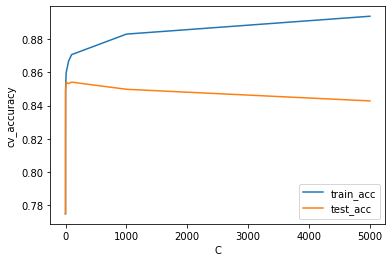

In [41]:
sns.lineplot(x = df['C'], y = df['cv_train_accuracy'])
sns.lineplot(x = df['C'], y = df['cv_test_accuracy'])
plt.ylabel('cv_accuracy')
plt.legend(['train_acc', 'test_acc'])
plt.show()

In [39]:
training_csv = "salary.labeled.csv"
testing_csv = "salary.2Predict.csv"
x,y, xcols = load_data(training_csv, encode_cat = True, outlier_removal = True, 
                               feature_engineering = True, down_sample= False)
x = pd.DataFrame(MinMaxScaler().fit_transform(x) , columns = x.columns)

model = SVC(C = 100)
model.fit(x,y)

reading in data
removing outliers
Categorical one hot encoding


C:\Users\jdine\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [40]:
x_test,y_test, xcols = load_data(testing_csv, encode_cat = True, outlier_removal = False, 
                               feature_engineering = True, down_sample= False)
x_test = pd.DataFrame(MinMaxScaler().fit_transform(x_test) , columns = xcols)


reading in data
Categorical one hot encoding


In [41]:
predictions = predict(testing_csv, model, x)

reading in data
Categorical one hot encoding


In [42]:
from collections import Counter
Counter(predictions)


Counter({0: 9677, 1: 323})

In [48]:
import numpy as np
data = np.loadtxt('predictions1.txt', dtype = 'str')
Counter(data)


Counter({'<=50K': 7937, '>50K': 2063})